## Tutoriel d'exemple de résolution d'un problème de machine learning à l'aide du clustering par k-means

## Problème à résoudre

Dans ce tutoriel, nous allons classifier des iris en trois catégories en se basant sur quatre données : la longueur et la largeur de leurs sépales, et la longueur et la largeur de leurs pétales. Il s'agit donc d'un problème de classification.

**Il est important de noter ici que l'on ne connaît pas à l'avance les différentes catégories**. Pour réaliser ce travail, nous utiliserons [ce set de données](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset).

## Techniques et outils utilisés

Pour résoudre ce problème, nous allons faire appel à une technique **d'apprentissage non supervisé** basée sur la méthode des **k-means**. Voici une description de ces termes :
- L'apprentissage non supervisé est une technique qui consiste à entraîner un modèle de prédiction en lui donnant un set de données. À la différence de l'apprentissage supervisé, l'apprentissage non supervisé ne nécessite pas de donner au modèle les noms des labels attendus : c'est le modèle qui va automatiquement dégager plusieurs classes à partir des données dont il dispose.
- La méthode du clustering en k-means est une technique de machine learning où l'algorithme va identifier des groupes, ou **clusters**, dans les données placées dans un espace vectoriel. Par la suite, le modèle réalise des prédictions en classifiant les données dans le cluster qui leur est le plus proche.

Nous allons utiliser la librairie scikit-learn pour réaliser ce projet.

## Code

### Importation des librairies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

### Importation du dataset

Commençons par importer et explorer le dataset :

In [2]:
iris_data = load_iris(as_frame=True)
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

La description détaillée nous indique que ce dataset contient les longueurs et largeurs des pétales et sépales de 150 iris. Ces 1560 iris sont eux-mêmes séparés en trois types. La description de scikit-learn nous donne aussi des information intéressantes concernant la corrélation entre ces données et le type de la fleur : alors que la longueur et la largeur des pétales semblent être fortement liées au type de la fleur, la longueur et la largeur des sépales ne sont que faiblement corrélées au type de la fleur. Cet élément aura son importance plus loin dans ce tutoriel.

Affichons un échantillon de nos données pour vérifier que celles-ci ressemblent bien à ce que l'on attend :

In [3]:
print(iris_data.frame)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

### Phase d'apprentissage du modèle

La première étape dans la construction de notre modèle consiste à entraîner ce dernier. Dans cette étape, nous allons construire notre modèle en lui donnant un certain nombre d'exemples depuis notre base de données. La règle de base lors de cette étape est de séparer la base de données en deux : une partie pour l'apprentissage et une partie pour le test. Ceci afin de ne pas montrer lors de la phase de test des exemples de chiffres qui auraient servis lors de la phase d'apprentissage, car alors le test serait biaisé.

Ici, nous allons réaliser deux modèles distincts : le premier sera entraîné avec toutes les colonnes du dataset (longueur/largeur des sépales et des pédales), tandis que le second n'utilisera que les informations concernant les pétales. On pourra ensuite comparer la précision des deux modèles pour déterminer si les dimensions des sépales sont une information importante pour notre modèle de prédiction, ou si elles peuvent être omises.

In [4]:
# Séparation en set de données d'entraînement et de test (70 % train, 30 % test)
iris_df = iris_data.frame

train, test = train_test_split(iris_df, test_size=0.3)

# Sets de données avec toutes les colonnes

x_train = train.drop(columns=["target"])
x_test = test.drop(columns=["target"])
y_test = test["target"]

# Sets de données uniquement avec les colonnes qui concernent les pétales
x_train_2 = train.drop(columns=["target", "sepal length (cm)", "sepal width (cm)"])
x_test_2 = test.drop(columns=["target", "sepal length (cm)", "sepal width (cm)"])
y_test_2 = test["target"]     

Nous pouvons ensuite créer nos modèles et les entraîner :

In [5]:
# Entraînement du modèle avec toutes les données
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km_2 = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
# Remarquez que contrairement aux modèles en apprentissage supervisé, le K-means n'utilise pas
# de valeurs target pour l'entraînement
y_km = km.fit_predict(x_train)

# Entraînement du modèle uniquement avec les données concernant les pétales
y_km_2 = km_2.fit_predict(x_train_2)


Maintenant que nous avons entraîné nos deux modèles, commençons par visualiser les résultats. Dans la mesure où nos modèles utilisent en entrée des données qui sont parfois exprimées en plus de deux dimensions, il nous est difficile, voire impossible de visualiser les clusters directement. À la place, nous allons visualiser les résultats dans des matrices de confusion :

Correspondances entre la colonne 'True label' et les types d'iris :
O - Iris-Setosa
1 - Iris-Versicolour
2 - Iris-Virginica


Text(0.5, 1.0, 'Matrice de confusion pour le deuxième modèle (utilisation des dimensions des pétales uniquement)')

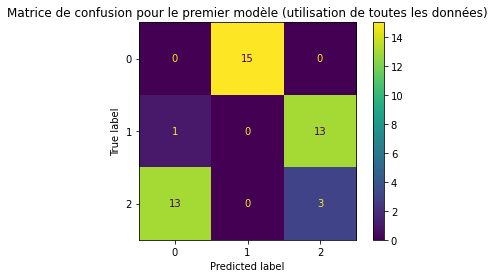

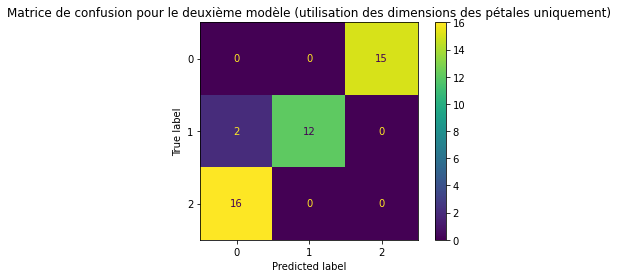

In [6]:
print("Correspondances entre la colonne 'True label' et les types d'iris :")
print("O - Iris-Setosa")
print("1 - Iris-Versicolour")
print("2 - Iris-Virginica")

# Affichage de la matrice de confusion pour le premier modèle (utilisation des 4 colonnes du dataset)
y_pred = km.predict(x_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matrice de confusion pour le premier modèle (utilisation de toutes les données)")


# Affichage de la matrice de confusion pour le deuxième modèle (utilisation des dimensions des pétales uniquement)
y_pred_2 = km_2.predict(x_test_2)
disp = ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred_2)
plt.title("Matrice de confusion pour le deuxième modèle (utilisation des dimensions des pétales uniquement)")

**Comment lire cette matrice de confusion ?** L'axe des ordonnées présente les catégories de fleurs données dans la colonne 'target' de nos données. L'axe des abscisses montre quant à lui les index des catégories délimitées par l'algorithme K-means.

Il faut ensuite observer les cases de la table. Le nombre 12 inscrit à l'intersection de la première ligne et de la première colonne, par exemple, indique que parmi les données du dataset labellisées comme étant des 'iris-setosa', 12 ont été classées par l'algorithme dans la catégorie 0.

En étudiant ces matrices de confusion, nous pouvons faire trois observations intéressantes :
- On observe que l'algorithme a globalement bien réussi à identifier trois clusters dans les données
- Que l'on utilise toutes les données fournies ou seulement celles concernant les pétales, le type de fleur que l'algorithme a le plus de mal à identifier est la Iris-Virginica (catégorie 2 dans 'True Label')
- Tenir compte uniquement les dimensions des pétales semble mener à des résultats plus précis que si l'on utilisait toutes les données à disposition.

## Conclusion

Ce tutoriel est maintenant terminé ! N'hésitez pas à jouer avec les paramètres pour mieux vous familiariser avec les k-means et à explorer la documentation de scikit-learn pour découvrir les différents types de modèles disponibles.